In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt


def load_and_prepare(path: str = "Book1.xlsx") -> pd.DataFrame:
    """実験結果 Excel を読み込み、モデル種別やパラメータを付与した DataFrame を返す。

    Args:
        path: 読み込む Excel ファイルのパス。

    Returns:
        前処理済みの DataFrame。
    """
    df = pd.read_excel(path)

    # filename が NaN の行を落とす
    df = df[df["filename"].notna()].copy()

    # モデル種別
    def parse_model_type(name: str) -> str:
        if name.startswith("nomal_model"):
            return "normal"
        if name.startswith("sparse_model"):
            return "sparse_only"
        if name.startswith("model_sparse"):
            return "sparse_csr_int8"
        return "other"

    # param（パラメータ数）を抽出
    def parse_param(name: str) -> int | None:
        # model_sparse0.005_csr_int8_param70 の param70
        m = re.search(r"_param(\d+)", name)
        if m:
            return int(m.group(1))
        # nomal_model_50 の 50
        m = re.search(r"nomal_model_(\d+)", name)
        if m:
            return int(m.group(1))
        # sparse_model_30_0.005 の 30
        m = re.search(r"sparse_model_(\d+)_", name)
        if m:
            return int(m.group(1))
        return None

    # スパース閾値を抽出
    def parse_sparse_threshold(name: str) -> float | None:
        # model_sparse0.005_csr_int8_param70 の 0.005
        m = re.search(r"model_sparse([0-9.]+)_csr_int8", name)
        if m:
            return float(m.group(1))
        # sparse_model_30_0.005 の 0.005
        m = re.search(r"sparse_model_\d+_([0-9.]+)", name)
        if m:
            return float(m.group(1))
        return None

    df["model_type"] = df["filename"].astype(str).apply(parse_model_type)
    df["param"] = df["filename"].astype(str).apply(parse_param)
    df["sparse_th"] = df["filename"].astype(str).apply(parse_sparse_threshold)

    return df


# 実行例
if __name__ == "__main__":
    df = load_and_prepare("Book1.xlsx")
    print(df[["filename", "model_type", "param", "sparse_th", "bytes_1", "mean"]].head())


         filename model_type  param  sparse_th  bytes_1     mean
0  nomal_model_30     normal     30        NaN  16458.0  417.726
1  nomal_model_40     normal     40        NaN  27885.0  454.742
2  nomal_model_50     normal     50        NaN  42273.0  248.940
3  nomal_model_60     normal     60        NaN  59560.0  446.484
4  nomal_model_70     normal     70        NaN  79630.0      NaN


/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/3031663964.py:25: UserWarning: Glyph 12514 (\N{KATAKANA LETTER MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/3031663964.py:25: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/3031663964.py:25: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/3031663964.py:25: UserWarning: Glyph 12469 (\N{KATAKANA LETTER SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/3031663964.py:25: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/30

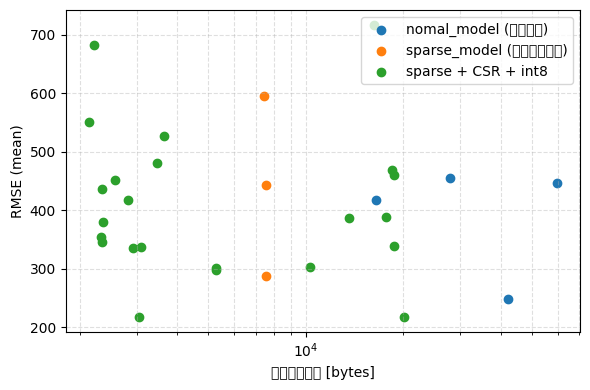

In [2]:
import matplotlib.pyplot as plt

df = load_and_prepare("Book1.xlsx")

plt.figure(figsize=(6, 4))

# モデル種別ごとにプロット
labels = {
    "normal": "nomal_model (元モデル)",
    "sparse_only": "sparse_model (スパースのみ)",
    "sparse_csr_int8": "sparse + CSR + int8",
}

for mtype, label in labels.items():
    sub = df[df["model_type"] == mtype]
    if sub.empty:
        continue
    plt.scatter(sub["bytes_1"], sub["mean"], label=label)

plt.xlabel("モデルサイズ [bytes]")
plt.ylabel("RMSE (mean)")
plt.xscale("log")  # サイズの差が大きいので対数軸が見やすい
plt.grid(True, which="both", linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/3215196389.py:12: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/3215196389.py:12: UserWarning: Glyph 12497 (\N{KATAKANA LETTER PA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/3215196389.py:12: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/3215196389.py:12: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/3215196389.py:12: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000g

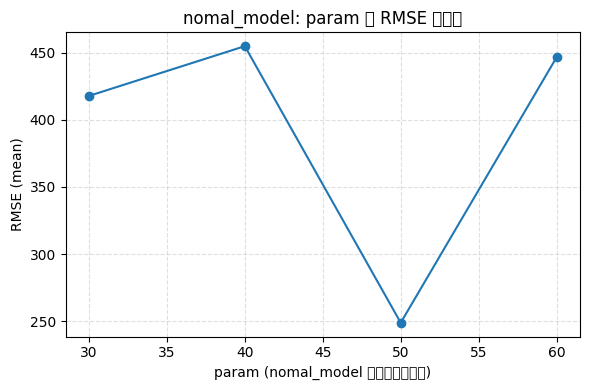

         filename  param  bytes_1     mean
0  nomal_model_30     30  16458.0  417.726
1  nomal_model_40     40  27885.0  454.742
2  nomal_model_50     50  42273.0  248.940
3  nomal_model_60     60  59560.0  446.484


In [3]:
df = load_and_prepare("Book1.xlsx")

nomal = df[df["model_type"] == "normal"].dropna(subset=["param", "mean"])
nomal = nomal.sort_values("param")

plt.figure(figsize=(6, 4))
plt.plot(nomal["param"], nomal["mean"], marker="o")
plt.xlabel("param (nomal_model のパラメータ数)")
plt.ylabel("RMSE (mean)")
plt.title("nomal_model: param と RMSE の関係")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

print(nomal[["filename", "param", "bytes_1", "mean"]])


/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/2403252303.py:14: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/2403252303.py:14: UserWarning: Glyph 12497 (\N{KATAKANA LETTER PA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/2403252303.py:14: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/2403252303.py:14: UserWarning: Glyph 38334 (\N{CJK UNIFIED IDEOGRAPH-95BE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/2403252303.py:14: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8c

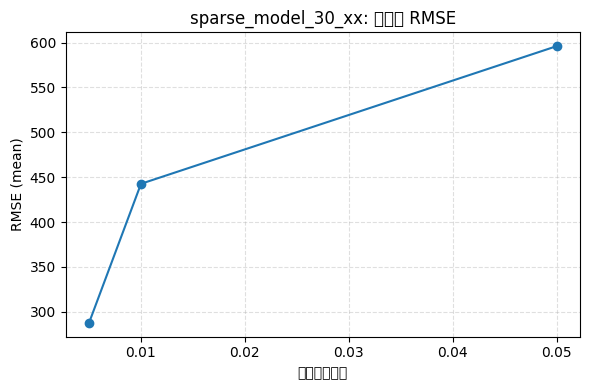

                filename  sparse_th  bytes_1     mean
6  sparse_model_30_0.005      0.005   7550.0  287.668
7   sparse_model_30_0.01      0.010   7540.0  442.636
8   sparse_model_30_0.05      0.050   7440.0  595.956


In [4]:
df = load_and_prepare("Book1.xlsx")

sparse30 = df[df["filename"].str.startswith("sparse_model_30_")].dropna(
    subset=["sparse_th", "mean"]
)
sparse30 = sparse30.sort_values("sparse_th")

plt.figure(figsize=(6, 4))
plt.plot(sparse30["sparse_th"], sparse30["mean"], marker="o")
plt.xlabel("スパース閾値")
plt.ylabel("RMSE (mean)")
plt.title("sparse_model_30_xx: 閾値と RMSE")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

print(sparse30[["filename", "sparse_th", "bytes_1", "mean"]])


/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/178062318.py:7: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/178062318.py:7: UserWarning: Glyph 12497 (\N{KATAKANA LETTER PA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/178062318.py:7: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/178062318.py:7: UserWarning: Glyph 38334 (\N{CJK UNIFIED IDEOGRAPH-95BE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/178062318.py:7: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68

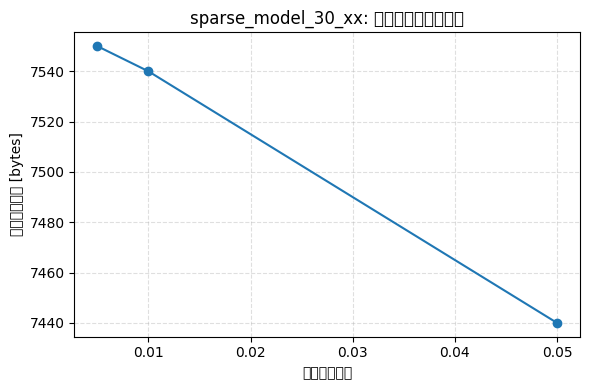

In [5]:
plt.figure(figsize=(6, 4))
plt.plot(sparse30["sparse_th"], sparse30["bytes_1"], marker="o")
plt.xlabel("スパース閾値")
plt.ylabel("モデルサイズ [bytes]")
plt.title("sparse_model_30_xx: 閾値とモデルサイズ")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/1205524364.py:13: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/yasuo/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


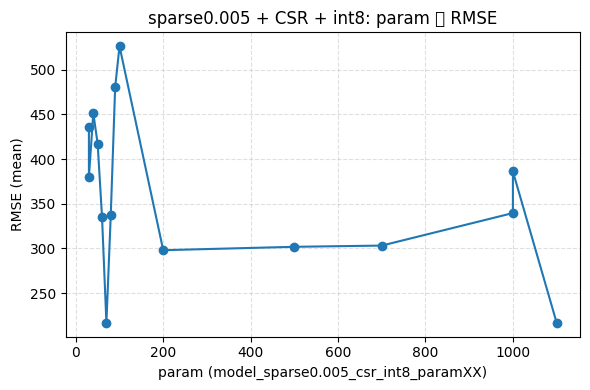

                                filename  param  bytes_1        mean
13    model_sparse0.005_csr_int8_param30     30   2348.0  435.780000
22    model_sparse0.005_csr_int8_param30     30   2368.0  379.674000
23    model_sparse0.005_csr_int8_param40     40   2578.0  451.724000
24    model_sparse0.005_csr_int8_param50     50   2815.0  417.150000
25    model_sparse0.005_csr_int8_param60     60   2918.0  335.150000
26    model_sparse0.005_csr_int8_param70     70   3053.0  216.734000
27    model_sparse0.005_csr_int8_param80     80   3097.0  337.273333
28    model_sparse0.005_csr_int8_param90     90   3482.0  480.256667
29   model_sparse0.005_csr_int8_param100    100   3650.0  526.493333
30   model_sparse0.005_csr_int8_param200    200   5278.0  297.990000
31   model_sparse0.005_csr_int8_param500    500   5278.0  301.790000
32   model_sparse0.005_csr_int8_param700    700  10290.0  303.160000
19  model_sparse0.005_csr_int8_param1000   1000  18709.0  339.576667
33  model_sparse0.005_csr_int8_par

In [6]:
df = load_and_prepare("Book1.xlsx")

cond = (df["model_type"] == "sparse_csr_int8") & (df["sparse_th"] == 0.005)
csr005 = df[cond].dropna(subset=["param", "mean"])
csr005 = csr005.sort_values("param")

plt.figure(figsize=(6, 4))
plt.plot(csr005["param"], csr005["mean"], marker="o")
plt.xlabel("param (model_sparse0.005_csr_int8_paramXX)")
plt.ylabel("RMSE (mean)")
plt.title("sparse0.005 + CSR + int8: param と RMSE")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

print(csr005[["filename", "param", "bytes_1", "mean"]])


/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/2617537670.py:7: UserWarning: Glyph 12514 (\N{KATAKANA LETTER MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/2617537670.py:7: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/2617537670.py:7: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/2617537670.py:7: UserWarning: Glyph 12469 (\N{KATAKANA LETTER SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/2617537670.py:7: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/2617537

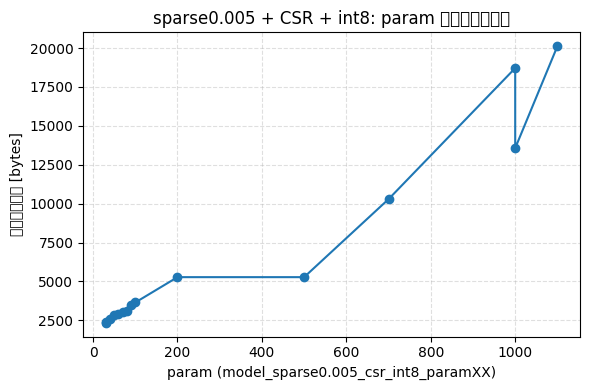

In [7]:
plt.figure(figsize=(6, 4))
plt.plot(csr005["param"], csr005["bytes_1"], marker="o")
plt.xlabel("param (model_sparse0.005_csr_int8_paramXX)")
plt.ylabel("モデルサイズ [bytes]")
plt.title("sparse0.005 + CSR + int8: param とモデルサイズ")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# ここは前回の関数をそのまま使う想定
# from your_module import load_and_prepare

df = load_and_prepare("Book1.xlsx")

# nomal_model 系（元モデル）
normal = (
    df[df["model_type"] == "normal"]
    .dropna(subset=["param", "mean"])
    .loc[:, ["filename", "param", "bytes_1", "mean"]]
)

# sparse0.005 + CSR + int8 系（圧縮モデル）
compressed = (
    df[
        (df["model_type"] == "sparse_csr_int8")
        & (df["sparse_th"] == 0.005)
    ]
    .dropna(subset=["param", "mean"])
    .loc[:, ["filename", "param", "bytes_1", "mean"]]
)

# param で内部結合 → どちらにも存在する param だけ残る
paired = pd.merge(
    normal,
    compressed,
    on="param",
    suffixes=("_normal", "_compressed"),
)

# param 順に並べる
paired = paired.sort_values("param").reset_index(drop=True)

print(paired)


  filename_normal  param  bytes_1_normal  mean_normal  \
0  nomal_model_30     30         16458.0      417.726   
1  nomal_model_30     30         16458.0      417.726   
2  nomal_model_40     40         27885.0      454.742   
3  nomal_model_50     50         42273.0      248.940   
4  nomal_model_60     60         59560.0      446.484   

                  filename_compressed  bytes_1_compressed  mean_compressed  
0  model_sparse0.005_csr_int8_param30              2348.0          435.780  
1  model_sparse0.005_csr_int8_param30              2368.0          379.674  
2  model_sparse0.005_csr_int8_param40              2578.0          451.724  
3  model_sparse0.005_csr_int8_param50              2815.0          417.150  
4  model_sparse0.005_csr_int8_param60              2918.0          335.150  


/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/873704400.py:22: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/873704400.py:22: UserWarning: Glyph 12497 (\N{KATAKANA LETTER PA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/873704400.py:22: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/873704400.py:22: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/873704400.py:22: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w00

/Users/yasuo/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yasuo/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yasuo/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12395 (\N{HIRAGANA LETTER NI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yasuo/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12362 (\N{HIRAGANA LETTER O}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yasuo/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12369 (\N{HIRAGANA LETTER KE}) missing from font(s) DejaVu San

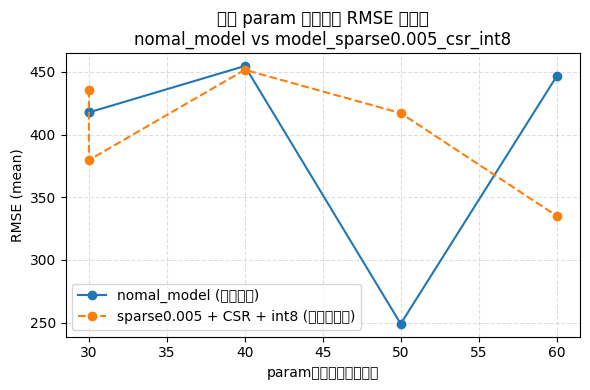

In [9]:
plt.figure(figsize=(6, 4))

plt.plot(
    paired["param"],
    paired["mean_normal"],
    marker="o",
    label="nomal_model (元モデル)",
)
plt.plot(
    paired["param"],
    paired["mean_compressed"],
    marker="o",
    linestyle="--",
    label="sparse0.005 + CSR + int8 (圧縮モデル)",
)

plt.xlabel("param（パラメータ数）")
plt.ylabel("RMSE (mean)")
plt.title("同一 param における RMSE の比較\nnomal_model vs model_sparse0.005_csr_int8")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/2892690751.py:22: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/2892690751.py:22: UserWarning: Glyph 12497 (\N{KATAKANA LETTER PA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/2892690751.py:22: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/2892690751.py:22: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/2892690751.py:22: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs

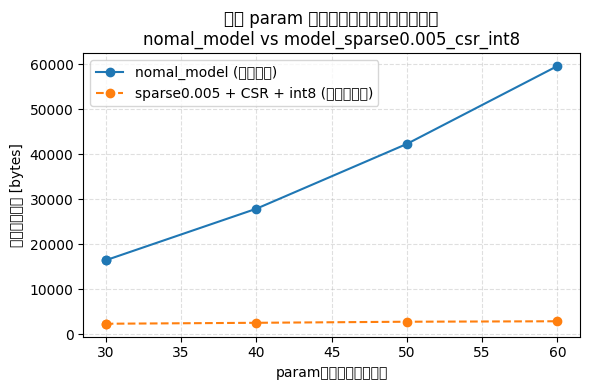

In [10]:
plt.figure(figsize=(6, 4))

plt.plot(
    paired["param"],
    paired["bytes_1_normal"],
    marker="o",
    label="nomal_model (元モデル)",
)
plt.plot(
    paired["param"],
    paired["bytes_1_compressed"],
    marker="o",
    linestyle="--",
    label="sparse0.005 + CSR + int8 (圧縮モデル)",
)

plt.xlabel("param（パラメータ数）")
plt.ylabel("モデルサイズ [bytes]")
plt.title("同一 param におけるモデルサイズの比較\nnomal_model vs model_sparse0.005_csr_int8")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


  filename_normal                 filename_compressed  param  rmse_diff  \
0  nomal_model_30  model_sparse0.005_csr_int8_param30     30     18.054   
1  nomal_model_30  model_sparse0.005_csr_int8_param30     30    -38.052   
2  nomal_model_40  model_sparse0.005_csr_int8_param40     40     -3.018   
3  nomal_model_50  model_sparse0.005_csr_int8_param50     50    168.210   
4  nomal_model_60  model_sparse0.005_csr_int8_param60     60   -111.334   

   size_ratio  
0    0.142666  
1    0.143881  
2    0.092451  
3    0.066591  
4    0.048993  


/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/3236169960.py:17: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/3236169960.py:17: UserWarning: Glyph 12497 (\N{KATAKANA LETTER PA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/3236169960.py:17: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/3236169960.py:17: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs68w0000gn/T/ipykernel_5172/3236169960.py:17: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cn/wb1xxprs41l8cbm22w4cs

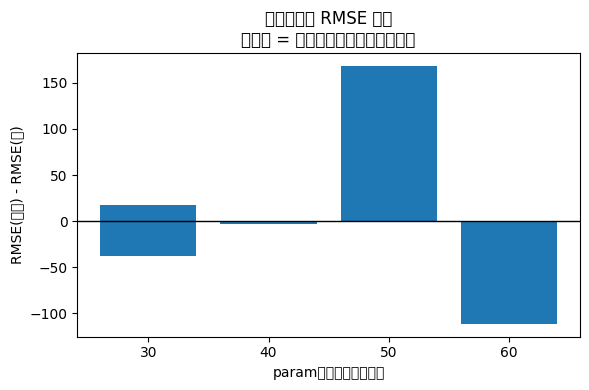

In [11]:
# 差分列を追加
paired["rmse_diff"] = paired["mean_compressed"] - paired["mean_normal"]
paired["size_ratio"] = paired["bytes_1_compressed"] / paired["bytes_1_normal"]

print(paired[["filename_normal", "filename_compressed", "param", "rmse_diff", "size_ratio"]])

plt.figure(figsize=(6, 4))
plt.axhline(0.0, color="black", linewidth=1)

plt.bar(
    paired["param"].astype(str),
    paired["rmse_diff"],
)
plt.xlabel("param（パラメータ数）")
plt.ylabel("RMSE(圧縮) - RMSE(元)")
plt.title("圧縮による RMSE 差分\n負の値 = 圧縮モデルの方が精度良い")
plt.tight_layout()
plt.show()


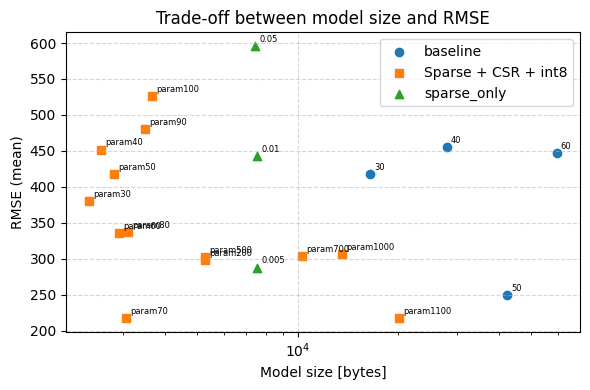

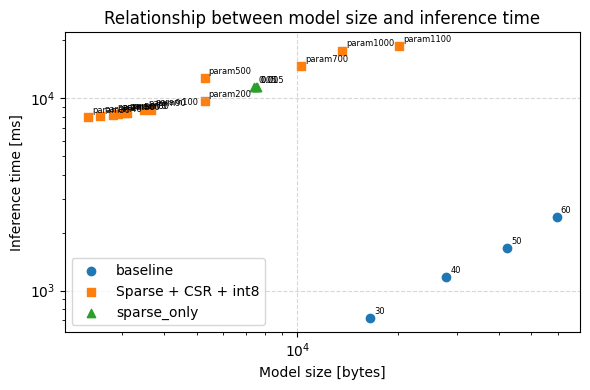

In [14]:
import math
import matplotlib.pyplot as plt

# =========================================================
# データ定義
#   category:
#     - "baseline"   : 非圧縮モデル (nomal_model_XX)
#     - "sparse_only": スパース化のみ (sparse_model_30_XXX)
#     - "csr_int8"   : Sparse + CSR + int8
# =========================================================

models = [
    # -------------------------
    # ベースライン（非圧縮）
    # -------------------------
    {"name": "nomal_model_30", "category": "baseline",
     "size": 16458, "time_ms": 716, "rmse": 417.726},
    {"name": "nomal_model_40", "category": "baseline",
     "size": 27885, "time_ms": 1177, "rmse": 454.742},
    {"name": "nomal_model_50", "category": "baseline",
     "size": 42273, "time_ms": 1655, "rmse": 248.94},
    {"name": "nomal_model_60", "category": "baseline",
     "size": 59560, "time_ms": 2399, "rmse": 446.484},
    # model_70 は時間・RMSE が測定不能だったので除外

    # -------------------------
    # スパース化のみ (param=30)
    # -------------------------
    {"name": "sparse_model_30_0.005", "category": "sparse_only",
     "size": 7550, "time_ms": 11424, "rmse": 287.668},
    {"name": "sparse_model_30_0.01", "category": "sparse_only",
     "size": 7540, "time_ms": 11424, "rmse": 442.636},
    {"name": "sparse_model_30_0.05", "category": "sparse_only",
     "size": 7440, "time_ms": 11424, "rmse": 595.956},

    # -------------------------
    # Sparse + CSR + int8 (閾値 alpha = 0.005)
    # -------------------------
    {"name": "model_sparse0.005_csr_int8_param30", "category": "csr_int8",
     "size": 2368, "time_ms": 7924, "rmse": 379.674},
    {"name": "model_sparse0.005_csr_int8_param40", "category": "csr_int8",
     "size": 2578, "time_ms": 8032, "rmse": 451.724},
    {"name": "model_sparse0.005_csr_int8_param50", "category": "csr_int8",
     "size": 2815, "time_ms": 8188, "rmse": 417.150},
    {"name": "model_sparse0.005_csr_int8_param60", "category": "csr_int8",
     "size": 2918, "time_ms": 8272, "rmse": 335.150},
    {"name": "model_sparse0.005_csr_int8_param70", "category": "csr_int8",
     "size": 3053, "time_ms": 8324, "rmse": 216.734},
    {"name": "model_sparse0.005_csr_int8_param80", "category": "csr_int8",
     "size": 3097, "time_ms": 8384, "rmse": 337.273},
    {"name": "model_sparse0.005_csr_int8_param90", "category": "csr_int8",
     "size": 3482, "time_ms": 8616, "rmse": 480.257},
    {"name": "model_sparse0.005_csr_int8_param100", "category": "csr_int8",
     "size": 3650, "time_ms": 8696, "rmse": 526.493},
    {"name": "model_sparse0.005_csr_int8_param200", "category": "csr_int8",
     "size": 5278, "time_ms": 9608, "rmse": 297.990},
    {"name": "model_sparse0.005_csr_int8_param500", "category": "csr_int8",
     "size": 5278, "time_ms": 12660, "rmse": 301.790},
    {"name": "model_sparse0.005_csr_int8_param700", "category": "csr_int8",
     "size": 10290, "time_ms": 14600, "rmse": 303.160},
    {"name": "model_sparse0.005_csr_int8_param1000", "category": "csr_int8",
     "size": 13566, "time_ms": 17632, "rmse": 306.173},
    {"name": "model_sparse0.005_csr_int8_param1100", "category": "csr_int8",
     "size": 20119, "time_ms": 18616, "rmse": 216.867},
    # param1200 は時間・RMSE 不明なので除外
]

# カテゴリごとのマーカー（色は matplotlib のデフォルトに任せる）
MARKERS = {
    "baseline": "o",
    "sparse_only": "^",
    "csr_int8": "s",
}

LABELS_JP = {
    "baseline": "非圧縮 (baseline)",
    "sparse_only": "スパースのみ",
    "csr_int8": "Sparse + CSR + int8",
}

LABELS_EN = {
    "normal": "Normal model",
    "sparse": "Sparse model",
    "csr_int8": "Sparse + CSR + int8",
    "base": "Baseline",
}



def plot_size_vs_rmse(models):
    """Plot the trade-off between model size [byte] and RMSE."""
    plt.figure(figsize=(6, 4))

    for category in sorted(set(m["category"] for m in models)):
        xs = []
        ys = []
        labels = []
        for m in models:
            if m["category"] != category:
                continue
            if m["rmse"] is None:
                continue
            xs.append(m["size"])
            ys.append(m["rmse"])
            labels.append(m["name"])

        if not xs:
            continue

        plt.scatter(
            xs, ys,
            marker=MARKERS.get(category, "o"),
            label=LABELS_EN.get(category, category)  # English label
        )

        # Add light annotations for each point (optional)
        for x, y, name in zip(xs, ys, labels):
            plt.annotate(
                name.split("_")[-1],  # show “param30” or “30”
                (x, y),
                textcoords="offset points",
                xytext=(3, 3),
                fontsize=6,
            )

    plt.xscale("log")
    plt.xlabel("Model size [bytes]")
    plt.ylabel("RMSE (mean)")
    plt.title("Trade-off between model size and RMSE")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_size_vs_time(models):
    """Plot the relationship between model size [byte] and inference time [ms]."""
    plt.figure(figsize=(6, 4))

    for category in sorted(set(m["category"] for m in models)):
        xs = []
        ys = []
        labels = []
        for m in models:
            if m["category"] != category:
                continue
            if m["time_ms"] is None:
                continue
            xs.append(m["size"])
            ys.append(m["time_ms"])
            labels.append(m["name"])

        if not xs:
            continue

        plt.scatter(
            xs, ys,
            marker=MARKERS.get(category, "o"),
            label=LABELS_EN.get(category, category)
        )

        # Add annotations for each point (optional)
        for x, y, name in zip(xs, ys, labels):
            plt.annotate(
                name.split("_")[-1],
                (x, y),
                textcoords="offset points",
                xytext=(3, 3),
                fontsize=6,
            )

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Model size [bytes]")
    plt.ylabel("Inference time [ms]")
    plt.title("Relationship between model size and inference time")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    plot_size_vs_rmse(models)
    plot_size_vs_time(models)


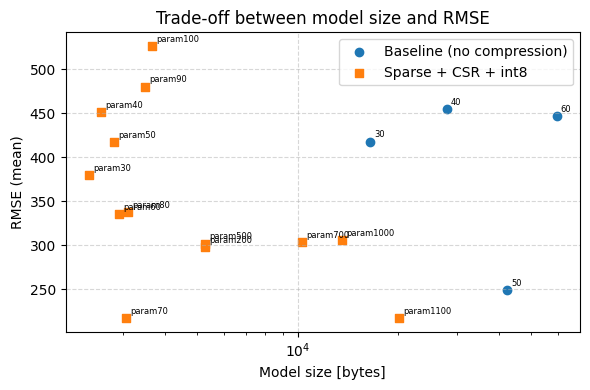

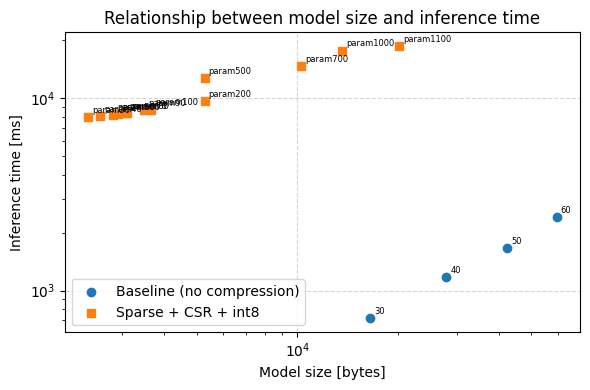

In [15]:
import math
import matplotlib.pyplot as plt

# =========================================================
# データ定義
#   category:
#     - "baseline" : 非圧縮モデル
#     - "csr_int8" : Sparse + CSR + int8
# =========================================================

models = [
    # -------------------------
    # ベースライン（非圧縮）
    # -------------------------
    {"name": "nomal_model_30", "category": "baseline",
     "size": 16458, "time_ms": 716, "rmse": 417.726},
    {"name": "nomal_model_40", "category": "baseline",
     "size": 27885, "time_ms": 1177, "rmse": 454.742},
    {"name": "nomal_model_50", "category": "baseline",
     "size": 42273, "time_ms": 1655, "rmse": 248.94},
    {"name": "nomal_model_60", "category": "baseline",
     "size": 59560, "time_ms": 2399, "rmse": 446.484},

    # -------------------------
    # Sparse + CSR + int8
    # -------------------------
    {"name": "model_sparse0.005_csr_int8_param30", "category": "csr_int8",
     "size": 2368, "time_ms": 7924, "rmse": 379.674},
    {"name": "model_sparse0.005_csr_int8_param40", "category": "csr_int8",
     "size": 2578, "time_ms": 8032, "rmse": 451.724},
    {"name": "model_sparse0.005_csr_int8_param50", "category": "csr_int8",
     "size": 2815, "time_ms": 8188, "rmse": 417.150},
    {"name": "model_sparse0.005_csr_int8_param60", "category": "csr_int8",
     "size": 2918, "time_ms": 8272, "rmse": 335.150},
    {"name": "model_sparse0.005_csr_int8_param70", "category": "csr_int8",
     "size": 3053, "time_ms": 8324, "rmse": 216.734},
    {"name": "model_sparse0.005_csr_int8_param80", "category": "csr_int8",
     "size": 3097, "time_ms": 8384, "rmse": 337.273},
    {"name": "model_sparse0.005_csr_int8_param90", "category": "csr_int8",
     "size": 3482, "time_ms": 8616, "rmse": 480.257},
    {"name": "model_sparse0.005_csr_int8_param100", "category": "csr_int8",
     "size": 3650, "time_ms": 8696, "rmse": 526.493},
    {"name": "model_sparse0.005_csr_int8_param200", "category": "csr_int8",
     "size": 5278, "time_ms": 9608, "rmse": 297.990},
    {"name": "model_sparse0.005_csr_int8_param500", "category": "csr_int8",
     "size": 5278, "time_ms": 12660, "rmse": 301.790},
    {"name": "model_sparse0.005_csr_int8_param700", "category": "csr_int8",
     "size": 10290, "time_ms": 14600, "rmse": 303.160},
    {"name": "model_sparse0.005_csr_int8_param1000", "category": "csr_int8",
     "size": 13566, "time_ms": 17632, "rmse": 306.173},
    {"name": "model_sparse0.005_csr_int8_param1100", "category": "csr_int8",
     "size": 20119, "time_ms": 18616, "rmse": 216.867},
]

# カテゴリごとのマーカー
MARKERS = {
    "baseline": "o",
    "csr_int8": "s",
}

LABELS_EN = {
    "baseline": "Baseline (no compression)",
    "csr_int8": "Sparse + CSR + int8",
}


def plot_size_vs_rmse(models):
    """Plot the trade-off between model size [byte] and RMSE."""
    plt.figure(figsize=(6, 4))

    for category in sorted(set(m["category"] for m in models)):
        xs, ys, labels = [], [], []
        for m in models:
            if m["category"] != category:
                continue
            xs.append(m["size"])
            ys.append(m["rmse"])
            labels.append(m["name"])

        plt.scatter(xs, ys, marker=MARKERS[category],
                    label=LABELS_EN.get(category, category))

        # annotation
        for x, y, name in zip(xs, ys, labels):
            plt.annotate(
                name.split("_")[-1],
                (x, y),
                textcoords="offset points",
                xytext=(3, 3),
                fontsize=6,
            )

    plt.xscale("log")
    plt.xlabel("Model size [bytes]")
    plt.ylabel("RMSE (mean)")
    plt.title("Trade-off between model size and RMSE")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_size_vs_time(models):
    """Plot the relationship between model size [byte] and inference time [ms]."""
    plt.figure(figsize=(6, 4))

    for category in sorted(set(m["category"] for m in models)):
        xs, ys, labels = [], [], []
        for m in models:
            if m["category"] != category:
                continue
            xs.append(m["size"])
            ys.append(m["time_ms"])
            labels.append(m["name"])

        plt.scatter(xs, ys, marker=MARKERS[category],
                    label=LABELS_EN.get(category, category))

        for x, y, name in zip(xs, ys, labels):
            plt.annotate(
                name.split("_")[-1],
                (x, y),
                textcoords="offset points",
                xytext=(3, 3),
                fontsize=6,
            )

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Model size [bytes]")
    plt.ylabel("Inference time [ms]")
    plt.title("Relationship between model size and inference time")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    plot_size_vs_rmse(models)
    plot_size_vs_time(models)


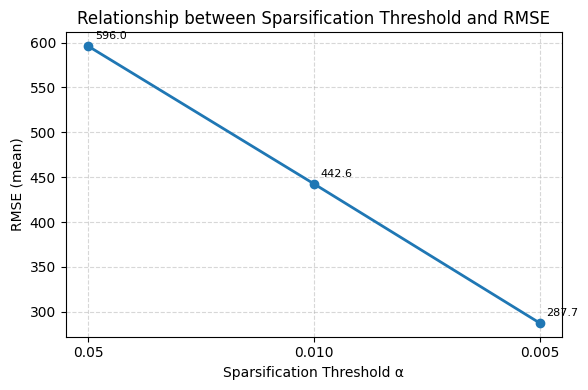

In [18]:
import matplotlib.pyplot as plt

# =========================================================
# Sparse-only (param=30) data
# =========================================================
threshold_labels = ["0.05", "0.010", "0.005"]
rmse_mean = [595.956, 442.636, 287.668]

def plot_threshold_vs_rmse(threshold_labels, rmse_mean):
    """Plot RMSE vs threshold with custom x-axis labels."""

    x = range(len(threshold_labels))  # 0, 1, 2

    plt.figure(figsize=(6, 4))
    plt.plot(x, rmse_mean, marker="o", linewidth=2)

    # X-axis labels in desired order
    plt.xticks(x, threshold_labels)

    # Annotate each point
    for xi, r in zip(x, rmse_mean):
        plt.annotate(f"{r:.1f}", (xi, r), textcoords="offset points",
                     xytext=(5, 5), fontsize=8)

    plt.xlabel("Sparsification Threshold α")
    plt.ylabel("RMSE (mean)")
    plt.title("Relationship between Sparsification Threshold and RMSE")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    plot_threshold_vs_rmse(threshold_labels, rmse_mean)


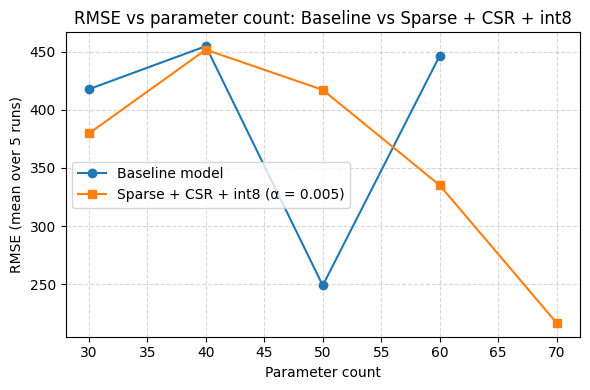

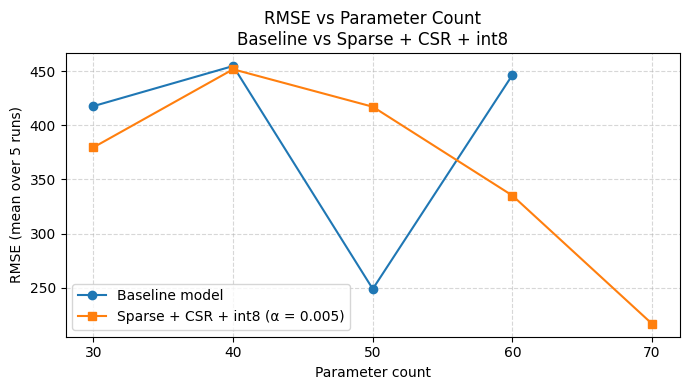

In [21]:
import matplotlib.pyplot as plt

# ============================================
# Data (Only the used values)
# ============================================
params = [30, 40, 50, 60, 70]

# Baseline RMSE (param=70 is missing → None)
rmse_baseline = [417.726, 454.742, 248.940, 446.484, None]

# Sparse + CSR + int8 (α = 0.005)
rmse_csr_int8 = [379.674, 451.724, 417.150, 335.150, 216.734]


def plot_param_vs_rmse(params, rmse_baseline, rmse_csr_int8):
    """Plot RMSE vs parameter count for Baseline and Sparse + CSR + int8."""

    plt.figure(figsize=(7, 4))

    # Baseline line: skip None values
    params_baseline = [p for p, r in zip(params, rmse_baseline) if r is not None]
    baseline_values = [r for r in rmse_baseline if r is not None]

    plt.plot(
        params_baseline,
        baseline_values,
        marker="o",
        linestyle="-",
        label="Baseline model",
    )

    # CSR+int8 line: all values exist
    plt.plot(
        params,
        rmse_csr_int8,
        marker="s",
        linestyle="-",
        label="Sparse + CSR + int8 (α = 0.005)",
    )

    # Labels and title
    plt.xlabel("Parameter count")
    plt.ylabel("RMSE (mean over 5 runs)")
    plt.title("RMSE vs Parameter Count\nBaseline vs Sparse + CSR + int8")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.xticks(params)  # show 30, 40, 50, 60, 70 explicitly
    plt.legend()
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    plot_param_vs_rmse(params, rmse_baseline, rmse_csr_int8)


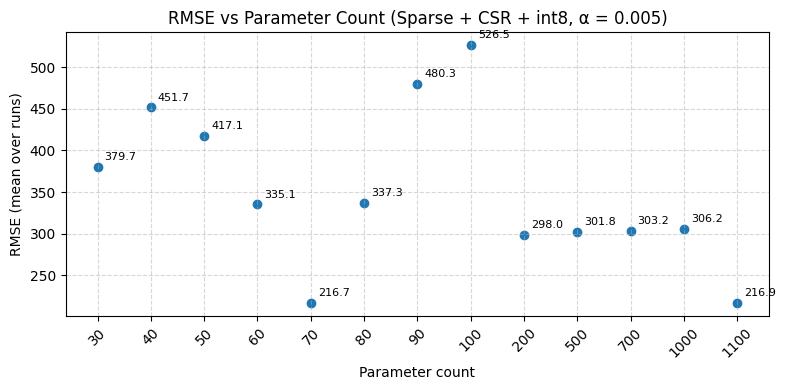

In [23]:
import matplotlib.pyplot as plt

# ====================================================
# Data extracted from the table (valid RMSE only)
# ====================================================

# Treat parameters as categorical labels for equal-width spacing
param_labels = [
    "30", "40", "50", "60", "70",
    "80", "90", "100", "200", "500",
    "700", "1000", "1100"
]

rmse = [
    379.674,  # p30
    451.724,  # p40
    417.150,  # p50
    335.150,  # p60
    216.734,  # p70
    337.273,  # p80
    480.257,  # p90
    526.493,  # p100
    297.990,  # p200
    301.790,  # p500
    303.160,  # p700
    306.173,  # p1000
    216.867,  # p1100
]

def plot_param_vs_rmse_scatter_equal_x(param_labels, rmse):
    """Scatter plot with equal-width categorical x-axis."""
    
    x = range(len(param_labels))  # 0,1,2,... (even spacing)

    plt.figure(figsize=(8, 4))
    plt.scatter(x, rmse, marker="o")

    # Annotate RMSE values
    for xi, r in zip(x, rmse):
        plt.annotate(f"{r:.1f}", (xi, r),
                     textcoords="offset points", xytext=(5, 5), fontsize=8)

    plt.xlabel("Parameter count")
    plt.ylabel("RMSE (mean over runs)")
    plt.title("RMSE vs Parameter Count (Sparse + CSR + int8, α = 0.005)")

    plt.grid(True, linestyle="--", alpha=0.5)

    # Set equal-width labels
    plt.xticks(x, param_labels, rotation=45)

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    plot_param_vs_rmse_scatter_equal_x(param_labels, rmse)


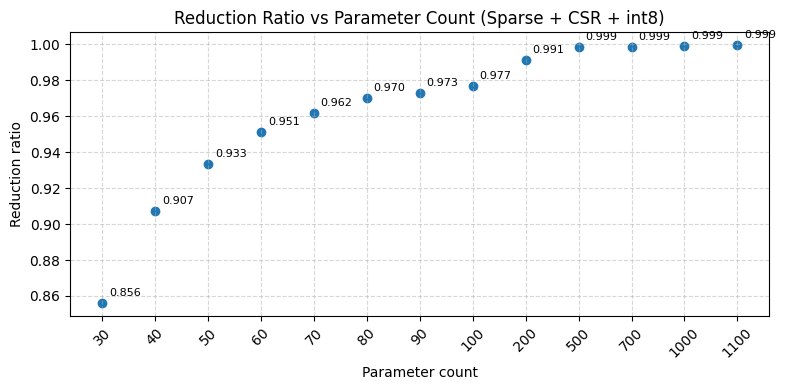

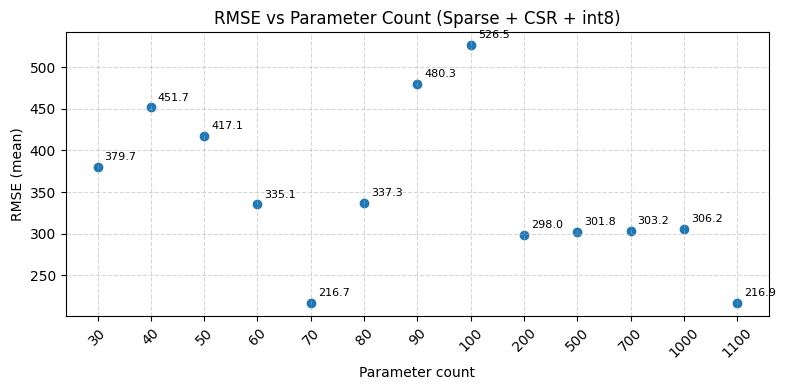

In [25]:
import matplotlib.pyplot as plt

# ====================================================
# Data for Sparse + CSR + int8 (α = 0.005)
# ====================================================

param_labels = [
    "30", "40", "50", "60", "70",
    "80", "90", "100", "200", "500",
    "700", "1000", "1100"
]

reduction_ratio = [
    0.8561, 0.9075, 0.9334, 0.9510, 0.9617,
    0.9700, 0.9730, 0.9769, 0.9913, 0.9986,
    0.9986, 0.9991, 0.9994
]

rmse = [
    379.674, 451.724, 417.150, 335.150, 216.734,
    337.273, 480.257, 526.493, 297.990, 301.790,
    303.160, 306.173, 216.867
]

# Convert labels to equal-width categorical positions
x = list(range(len(param_labels)))


# ====================================================
# ① 削減率 vs パラメータ（scatter only）
# ====================================================
def plot_param_vs_reduction_ratio(param_labels, reduction_ratio):
    plt.figure(figsize=(8, 4))
    plt.scatter(x, reduction_ratio, marker="o")

    # Annotate values
    for xi, v in zip(x, reduction_ratio):
        plt.annotate(f"{v:.3f}", (xi, v),
                     textcoords="offset points", xytext=(5, 5), fontsize=8)

    plt.xticks(x, param_labels, rotation=45)
    plt.ylabel("Reduction ratio")
    plt.xlabel("Parameter count")
    plt.title("Reduction Ratio vs Parameter Count (Sparse + CSR + int8)")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


# ====================================================
# ② RMSE vs パラメータ（scatter only）
# ====================================================
def plot_param_vs_rmse(param_labels, rmse):
    plt.figure(figsize=(8, 4))
    plt.scatter(x, rmse, marker="o")

    for xi, v in zip(x, rmse):
        plt.annotate(f"{v:.1f}", (xi, v),
                     textcoords="offset points", xytext=(5, 5), fontsize=8)

    plt.xticks(x, param_labels, rotation=45)
    plt.ylabel("RMSE (mean)")
    plt.xlabel("Parameter count")
    plt.title("RMSE vs Parameter Count (Sparse + CSR + int8)")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    plot_param_vs_reduction_ratio(param_labels, reduction_ratio)
    plot_param_vs_rmse(param_labels, rmse)


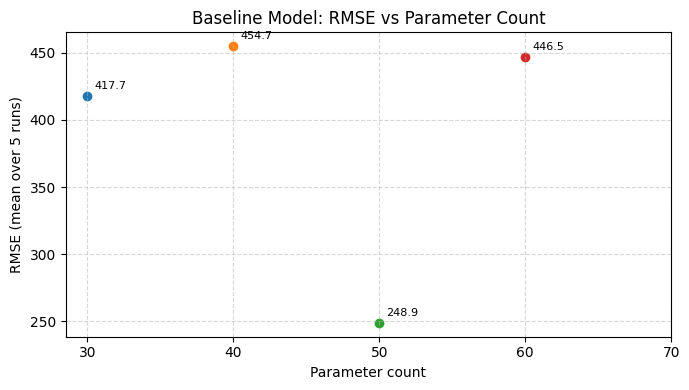

In [26]:
import matplotlib.pyplot as plt

# ====================================================
# Baseline model data (from the provided table)
# ====================================================

# X-axis labels (equal width)
param_labels = ["30", "40", "50", "60", "70"]

# RMSE values (70 is None because measurement failed)
rmse = [417.726, 454.742, 248.94, 446.484, None]

# Convert labels to equal-width categorical positions
x = list(range(len(param_labels)))  # [0,1,2,3,4]


def plot_baseline_param_vs_rmse(param_labels, rmse):
    """Scatter plot of RMSE vs param count (equal-width categorical axis)."""

    plt.figure(figsize=(7, 4))

    # Only plot valid RMSE points
    for xi, r in zip(x, rmse):
        if r is not None:
            plt.scatter(xi, r, marker="o")
            plt.annotate(f"{r:.1f}", (xi, r),
                         textcoords="offset points", xytext=(5, 5), fontsize=8)

    plt.xlabel("Parameter count")
    plt.ylabel("RMSE (mean over 5 runs)")
    plt.title("Baseline Model: RMSE vs Parameter Count")

    plt.grid(True, linestyle="--", alpha=0.5)
    plt.xticks(x, param_labels)  # show 30, 40, 50, 60, 70 evenly spaced

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    plot_baseline_param_vs_rmse(param_labels, rmse)
